# Practical

16.  Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Model Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Model Accuracy: 1.0


17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the
feature importances.

In [12]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances (Gini):", clf_gini.feature_importances_)

Feature Importances (Gini): [0.03575134 0.         0.88187037 0.08237829]


18.  Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the
model accuracy.

In [15]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
print("Model Accuracy (Entropy):", accuracy_score(y_test, clf_entropy.predict(X_test)))

Model Accuracy (Entropy): 0.9736842105263158


19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean
Squared Error (MSE).

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
Xh, yh = housing.data, housing.target
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(Xh_train, yh_train)
print("MSE:", mean_squared_error(yh_test, reg.predict(Xh_test)))

MSE: 0.5219096368763566


20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

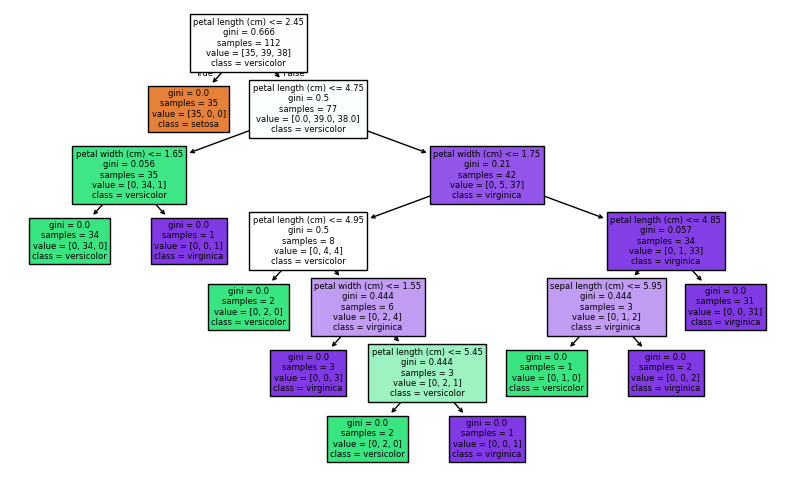

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
accuracy with a fully grown tree.

In [35]:
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
print("Accuracy (max_depth=3):", accuracy_score(y_test, clf_depth3.predict(X_test)))

Accuracy (max_depth=3): 1.0


22.  Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
accuracy with a default tree.

In [38]:
clf_mss = DecisionTreeClassifier(min_samples_split=5)
clf_mss.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_mss.predict(X_test)))

Accuracy (min_samples_split=5): 1.0


23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its
accuracy with unscaled data.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, random_state=42)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
print("Accuracy (with scaling):", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))

Accuracy (with scaling): 1.0


24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass
classification.

In [47]:
# OvR is the default strategy for multiclass in DecisionTreeClassifier
clf_ovr = DecisionTreeClassifier()
clf_ovr.fit(X_train, y_train)
print("Accuracy (OvR):", accuracy_score(y_test, clf_ovr.predict(X_test)))

Accuracy (OvR): 1.0


25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [52]:
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01787567 0.         0.89974604 0.08237829]


26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance
with an unrestricted tree.

In [55]:
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(Xh_train, yh_train)
print("MSE (max_depth=5):", mean_squared_error(yh_test, reg_depth5.predict(Xh_test)))

MSE (max_depth=5): 0.526799989691142


27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and
visualize its effect on accuracy.

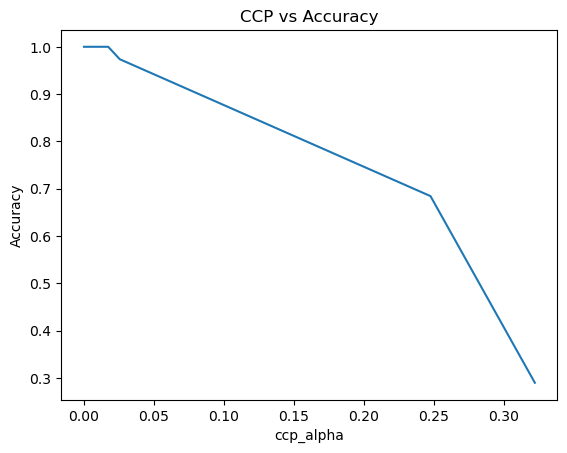

In [58]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

accuracies = []
for alpha in ccp_alphas:
    pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    pruned.fit(X_train, y_train)
    acc = accuracy_score(y_test, pruned.predict(X_test))
    accuracies.append(acc)

plt.plot(ccp_alphas, accuracies)
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("CCP vs Accuracy")
plt.show()

28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,
Recall, and F1-Score.

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

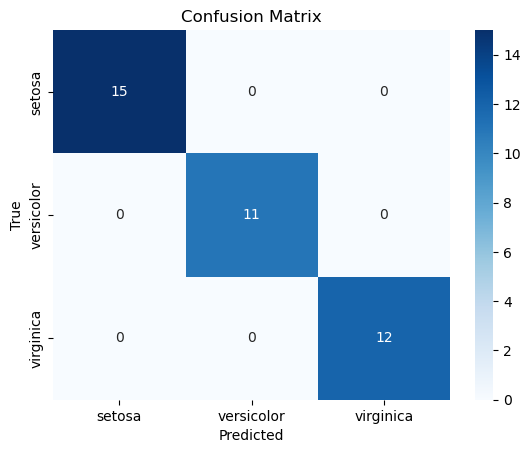

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values
for max_depth and min_samples_split.

In [69]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'max_depth': 4, 'min_samples_split': 2}
Best CV Accuracy: 0.9367588932806324
